## Importación de librerías

In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx # Para el manejo de social networks analysis
from sklearn.cluster import KMeans # Para el manejo de clusters
from yellowbrick.cluster import KElbowVisualizer # Para el manejo de clusters

## Dataset con el que se aplicarán las técnicas

In [125]:
df = pd.read_csv('analystFinal2.csv')

In [126]:
df.head()

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020 - 14:32:54 pm,Tiempo completo,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020 - 12:46:40 pm,Tiempo Completo,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020 - 12:46:36 pm,Tiempo Completo,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020 - 12:25:27 pm,Tiempo Completo,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020 - 12:25:22 pm,Tiempo Completo,Contrato por tiempo indefinido


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 907 non-null    int64 
 1   Nombre de trabajo  907 non-null    object
 2   Compania           907 non-null    object
 3   Salario            907 non-null    object
 4   Categoria          907 non-null    object
 5   Subcategoria       907 non-null    object
 6   Localidad          907 non-null    object
 7   Activo desde       907 non-null    object
 8   Jornada            907 non-null    object
 9   Tipo de contrato   907 non-null    object
dtypes: int64(1), object(9)
memory usage: 71.0+ KB


## SNA

### Primer método SNA con los features Categoría y Jornada

#### Valores únicos de los features a utilizar

In [128]:
df['Categoria'].unique()

array(['Almacenamiento / Logística / Distribución',
       'Comercial / Ventas / Atención al Cliente',
       'Diseño / Decoración / Artes Gráficas',
       'Recursos Humanos / Relaciones Públicas',
       'Informática / Telecomunicaciones', 'Medicina / Salud',
       'Producción / Mantenimiento / Operaciones',
       'Marketing / Publicidad / Producción Audiovisual',
       'Legal / Asesoría', 'Arquitectura / Ingenierías',
       'Hotelería / Turismo', 'Docencia / Educación',
       'Compras / Comercio Exterior',
       'Construcción / Obras / Edificaciones',
       'Administración / Contabilidad / Finanzas'], dtype=object)

In [129]:
df['Jornada'].unique()

array(['Tiempo completo', 'Tiempo Completo', 'Medio Tiempo', 'Por Horas',
       'Desde casa', 'Desde Casa', 'Beca/Prácticas', 'Tiempo parcial',
       'Por horas'], dtype=object)

#### Creación de dataframe únicamente con los features a utilizar

In [130]:
dfSNA1 = df[['Categoria', 'Jornada']]

In [131]:
# Se cambia cada valor de categoría y jornada a mayúscula
# Esto se debe a que existen registros "Tiempo Completo" y "Tiempo completo", cuando ambos son equivalente
# Otro caso es el de los registros con "Desde Casa" y "Desde casa"
dfSNA1['Categoria'] = dfSNA1['Categoria'].apply(lambda x: x.upper())
dfSNA1['Jornada'] = dfSNA1['Jornada'].apply(lambda x: x.upper())

<ipython-input-131-454897deb6e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSNA1['Categoria'] = dfSNA1['Categoria'].apply(lambda x: x.upper())
<ipython-input-131-454897deb6e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSNA1['Jornada'] = dfSNA1['Jornada'].apply(lambda x: x.upper())


In [132]:
dfSNA1.head()

,Categoria,Jornada
0,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
1,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
2,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
3,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
4,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO


#### Creación del primer grafo directo

In [133]:
G = nx.DiGraph()
for index, row in dfSNA1.iterrows():    
    G.add_edge(row['Categoria'], row['Jornada'])
    # Se calcula el weight de cada egde
    G[row['Categoria']][row['Jornada']]['weight'] = G[row['Categoria']][row['Jornada']].get('weight', 0) + 1

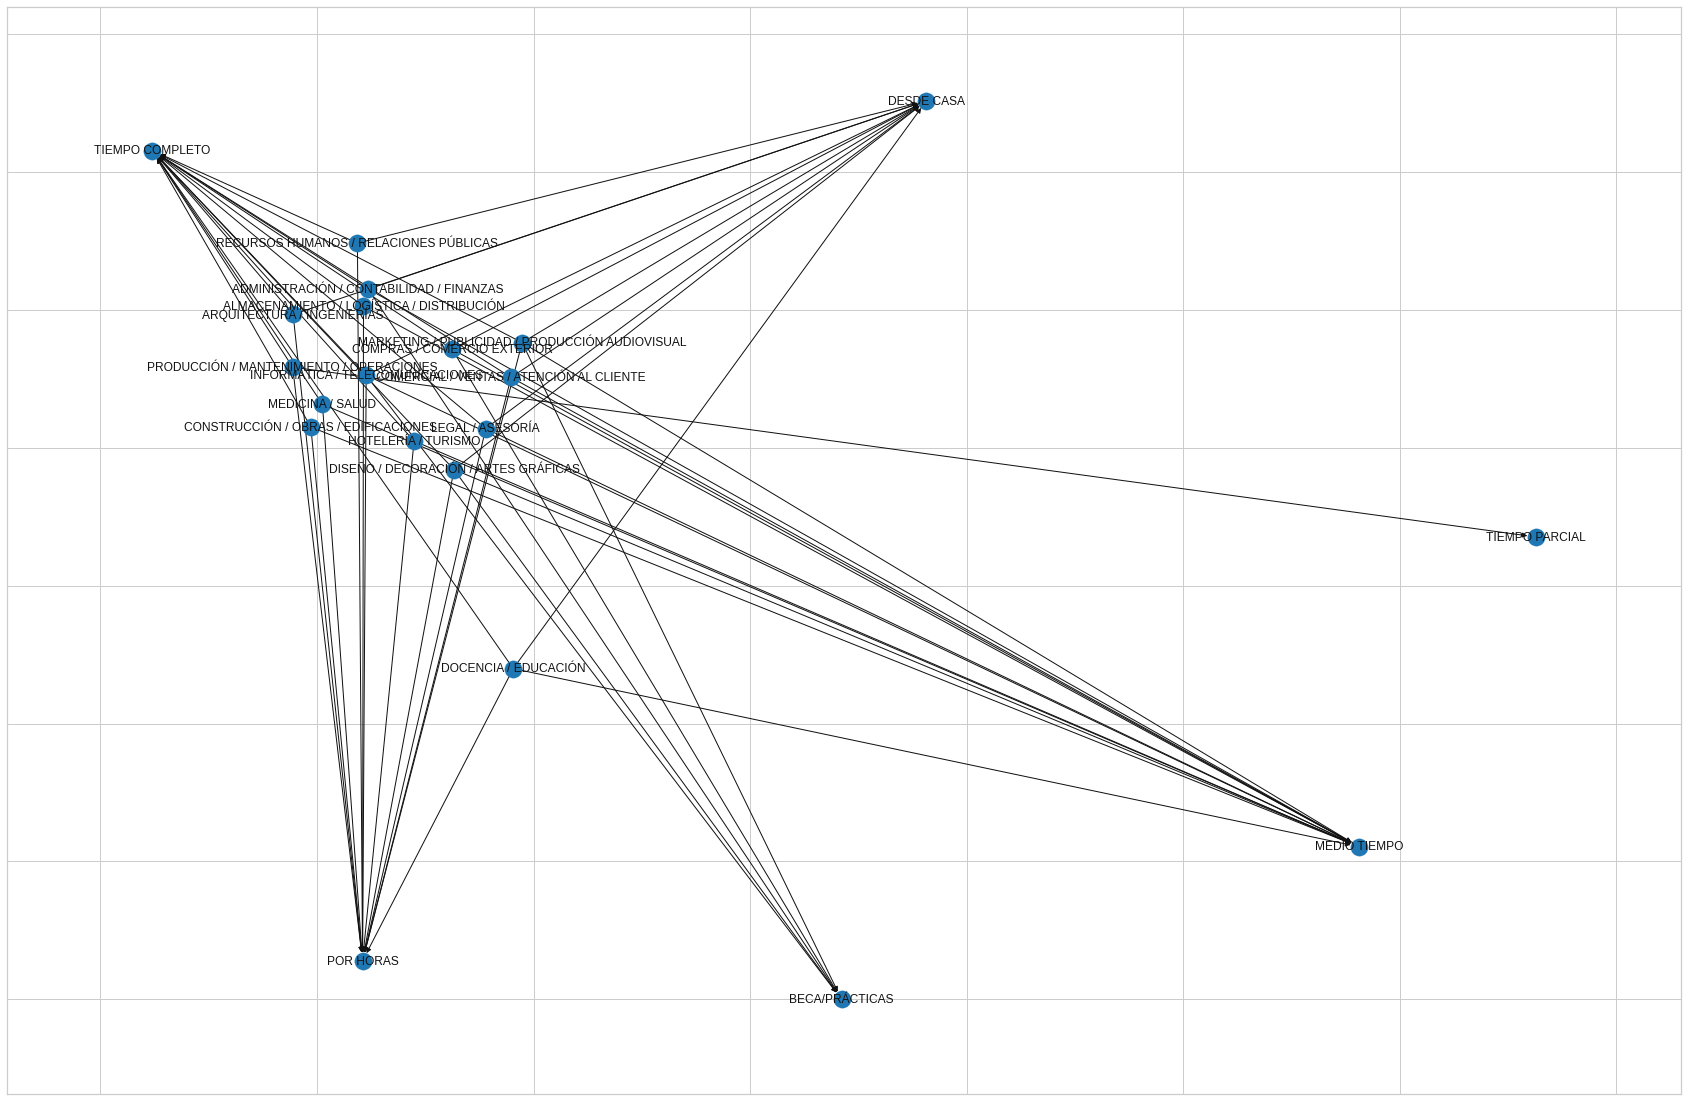

In [134]:
plt.figure(figsize=(30, 20))
nx.spring_layout(G)
nx.draw_networkx(G)

In [135]:
# Obtenemos el degree de cada nodo para utilizarlo posteriormente para cambiar el size del nodo
d = nx.degree(G)

In [136]:
d

DiDegreeView({'ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN': 3, 'TIEMPO COMPLETO': 15, 'MEDIO TIEMPO': 12, 'POR HORAS': 13, 'COMERCIAL / VENTAS / ATENCIÓN AL CLIENTE': 4, 'DESDE CASA': 10, 'DISEÑO / DECORACIÓN / ARTES GRÁFICAS': 5, 'BECA/PRÁCTICAS': 5, 'RECURSOS HUMANOS / RELACIONES PÚBLICAS': 3, 'INFORMÁTICA / TELECOMUNICACIONES': 5, 'MEDICINA / SALUD': 3, 'PRODUCCIÓN / MANTENIMIENTO / OPERACIONES': 3, 'TIEMPO PARCIAL': 1, 'MARKETING / PUBLICIDAD / PRODUCCIÓN AUDIOVISUAL': 5, 'LEGAL / ASESORÍA': 4, 'ARQUITECTURA / INGENIERÍAS': 3, 'HOTELERÍA / TURISMO': 3, 'DOCENCIA / EDUCACIÓN': 4, 'COMPRAS / COMERCIO EXTERIOR': 4, 'CONSTRUCCIÓN / OBRAS / EDIFICACIONES': 3, 'ADMINISTRACIÓN / CONTABILIDAD / FINANZAS': 4})

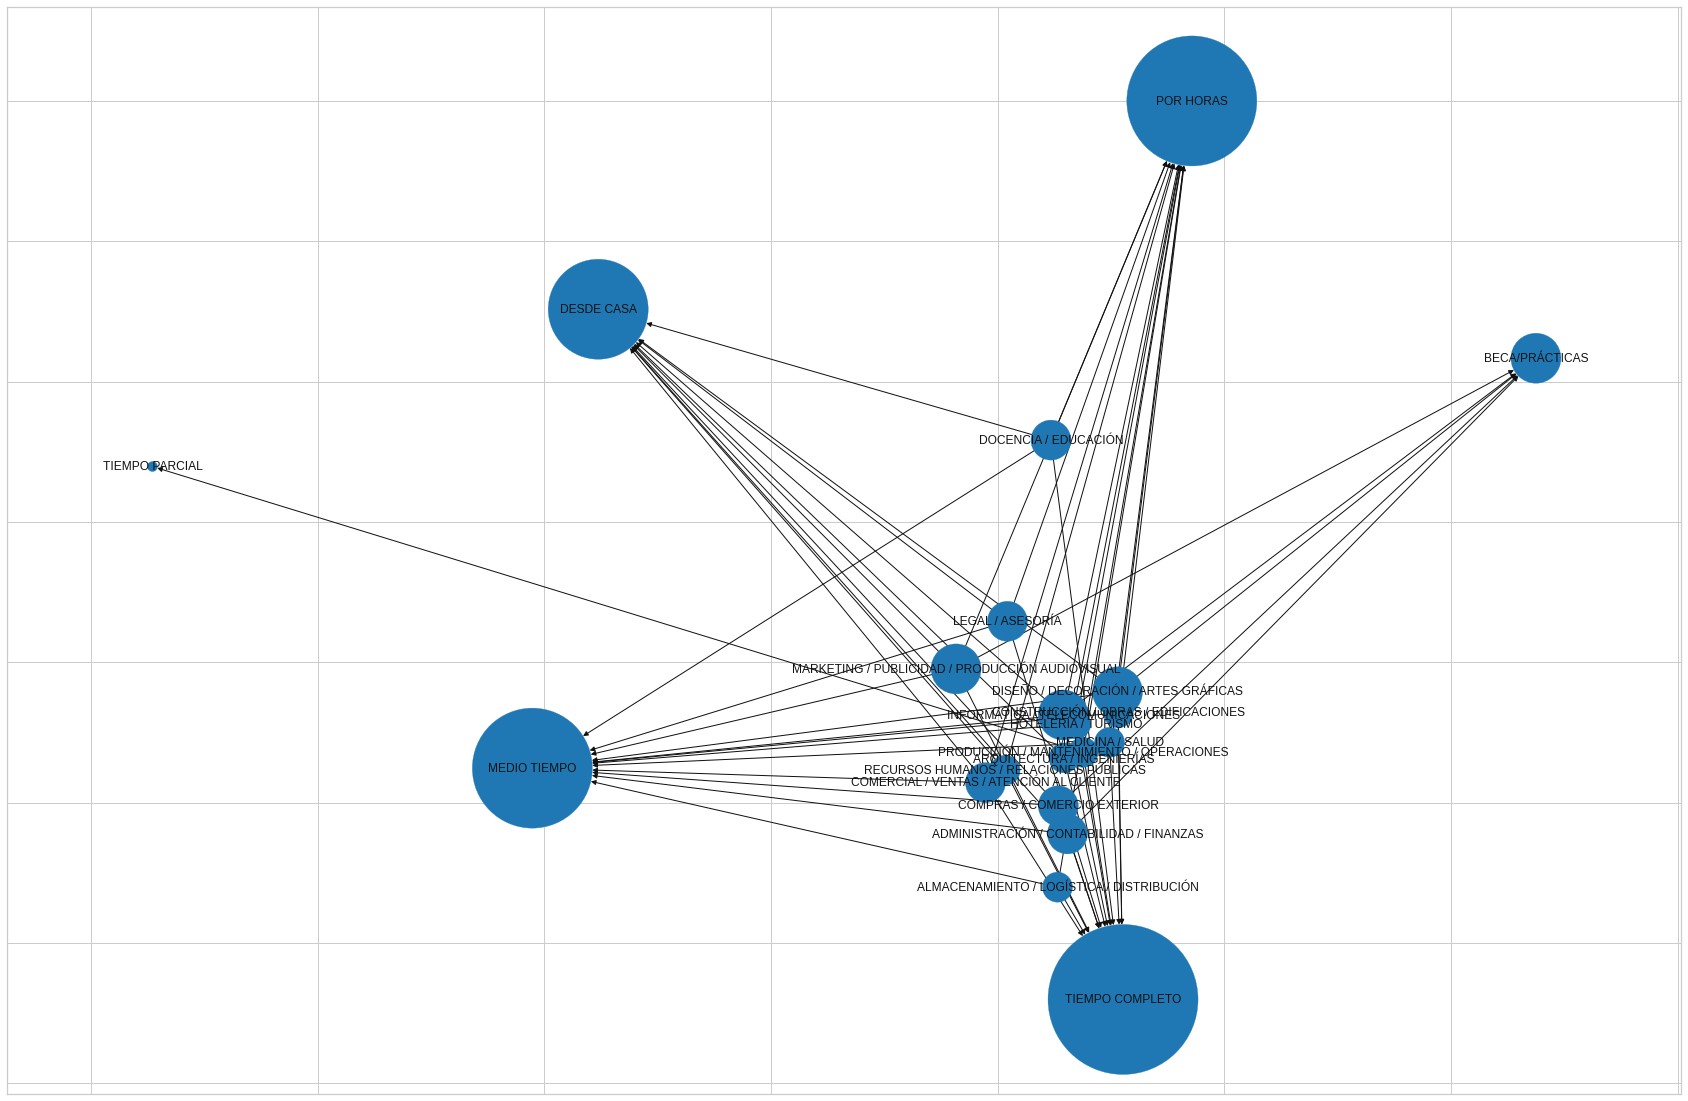

In [137]:
plt.figure(figsize=(30, 20))
nx.spring_layout(G)
# El size del nodo dependerá del número de edges que este tendrá
nx.draw_networkx(G, node_size=[v * v * 100 for v in list(dict(d).values())])

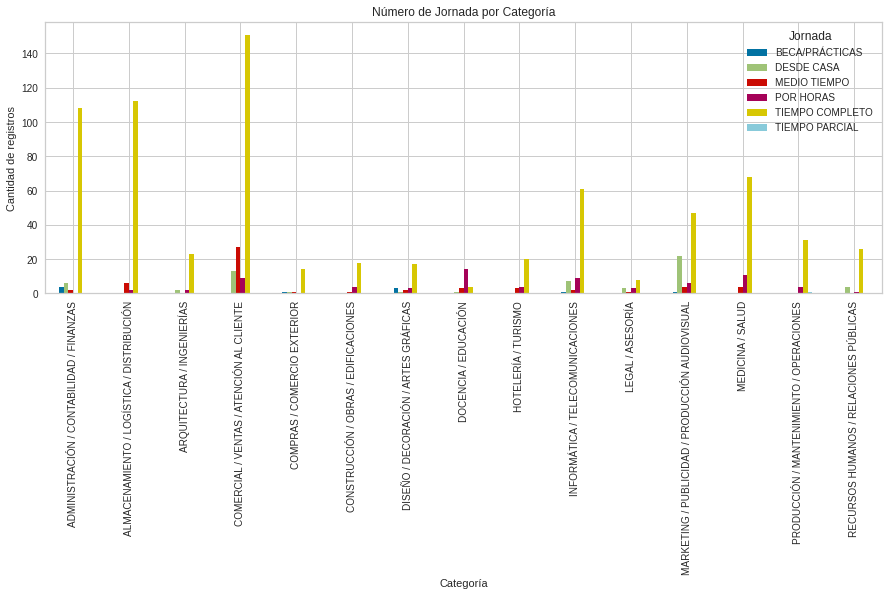

In [138]:
dfSNA1.groupby('Jornada').Categoria.value_counts().unstack(0).plot(kind='bar', figsize=(15, 5))
plt.title("Número de Jornada por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de registros")
plt.show()

### Segundo método SNA con los features Localidad y Jornada

#### Creación de dataframe únicamente con los features a utilizar

In [139]:
dfSNA2 = df[['Localidad', 'Jornada']]

In [140]:
# Se cambia cada valor de categoría y jornada a mayúscula
# Esto se debe a que existen registros "Tiempo Completo" y "Tiempo completo", cuando ambos son equivalente
# Otro caso es el de los registros con "Desde Casa" y "Desde casa"
dfSNA2['Localidad'] = dfSNA2['Localidad'].apply(lambda x: x.upper())
dfSNA2['Jornada'] = dfSNA2['Jornada'].apply(lambda x: x.upper())

<ipython-input-140-3e5a1f70ebd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSNA2['Localidad'] = dfSNA2['Localidad'].apply(lambda x: x.upper())
<ipython-input-140-3e5a1f70ebd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSNA2['Jornada'] = dfSNA2['Jornada'].apply(lambda x: x.upper())


In [141]:
dfSNA2.head()

,Localidad,Jornada
0,GUAYAQUIL,TIEMPO COMPLETO
1,QUITO,TIEMPO COMPLETO
2,GUAYAQUIL,TIEMPO COMPLETO
3,PORTOVIEJO,TIEMPO COMPLETO
4,MANTA,TIEMPO COMPLETO


#### Creación del segundo grafo directo

In [142]:
G2 = nx.DiGraph()
for index, row in dfSNA2.iterrows():    
    G2.add_edge(row['Localidad'], row['Jornada'])
    G2[row['Localidad']][row['Jornada']]['weight'] = G2[row['Localidad']][row['Jornada']].get('weight', 0) + 1

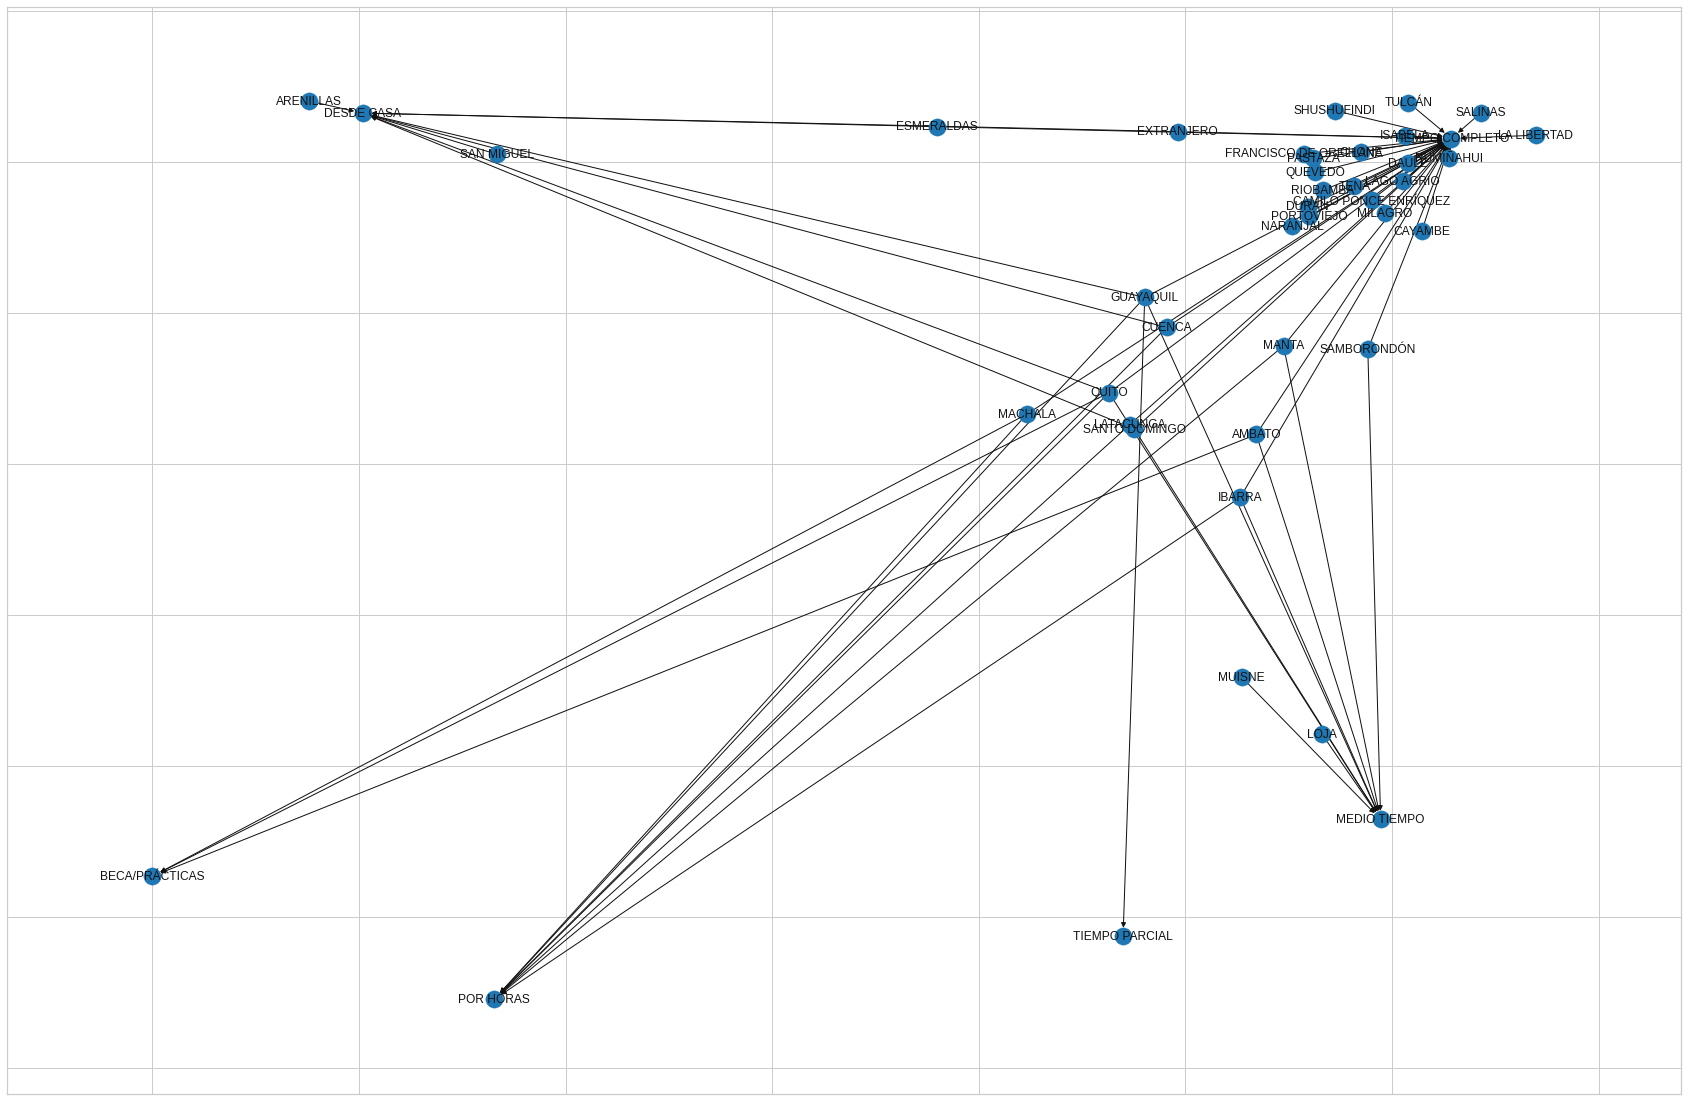

In [143]:
plt.figure(figsize=(30, 20))
nx.spring_layout(G2)
nx.draw_networkx(G2)

In [144]:
# Obtenemos el degree de cada nodo para utilizarlo posteriormente para cambiar el size del nodo
d2 = nx.degree(G2)

In [145]:
d2

DiDegreeView({'GUAYAQUIL': 5, 'TIEMPO COMPLETO': 32, 'QUITO': 5, 'PORTOVIEJO': 1, 'MANTA': 3, 'MACHALA': 3, 'DURÁN': 1, 'MEDIO TIEMPO': 9, 'AMBATO': 3, 'ESMERALDAS': 2, 'CUENCA': 3, 'LOJA': 1, 'ISABELA': 1, 'IBARRA': 3, 'POR HORAS': 7, 'SAMBORONDÓN': 2, 'DESDE CASA': 8, 'CHONE': 1, 'NARANJAL': 1, 'DAULE': 1, 'SANTO DOMINGO': 3, 'QUEVEDO': 1, 'LATACUNGA': 2, 'FRANCISCO DE ORELLANA': 1, 'RIOBAMBA': 1, 'EXTRANJERO': 2, 'BECA/PRÁCTICAS': 3, 'SALINAS': 1, 'RUMIÑAHUI': 1, 'MUISNE': 1, 'LAGO AGRIO': 1, 'SAN MIGUEL': 1, 'TIEMPO PARCIAL': 1, 'TENA': 1, 'PASTAZA': 1, 'ARENILLAS': 1, 'CAYAMBE': 1, 'LA LIBERTAD': 1, 'SHUSHUFINDI': 1, 'CAMILO PONCE ENRÍQUEZ': 1, 'TULCÁN': 1, 'MILAGRO': 1})

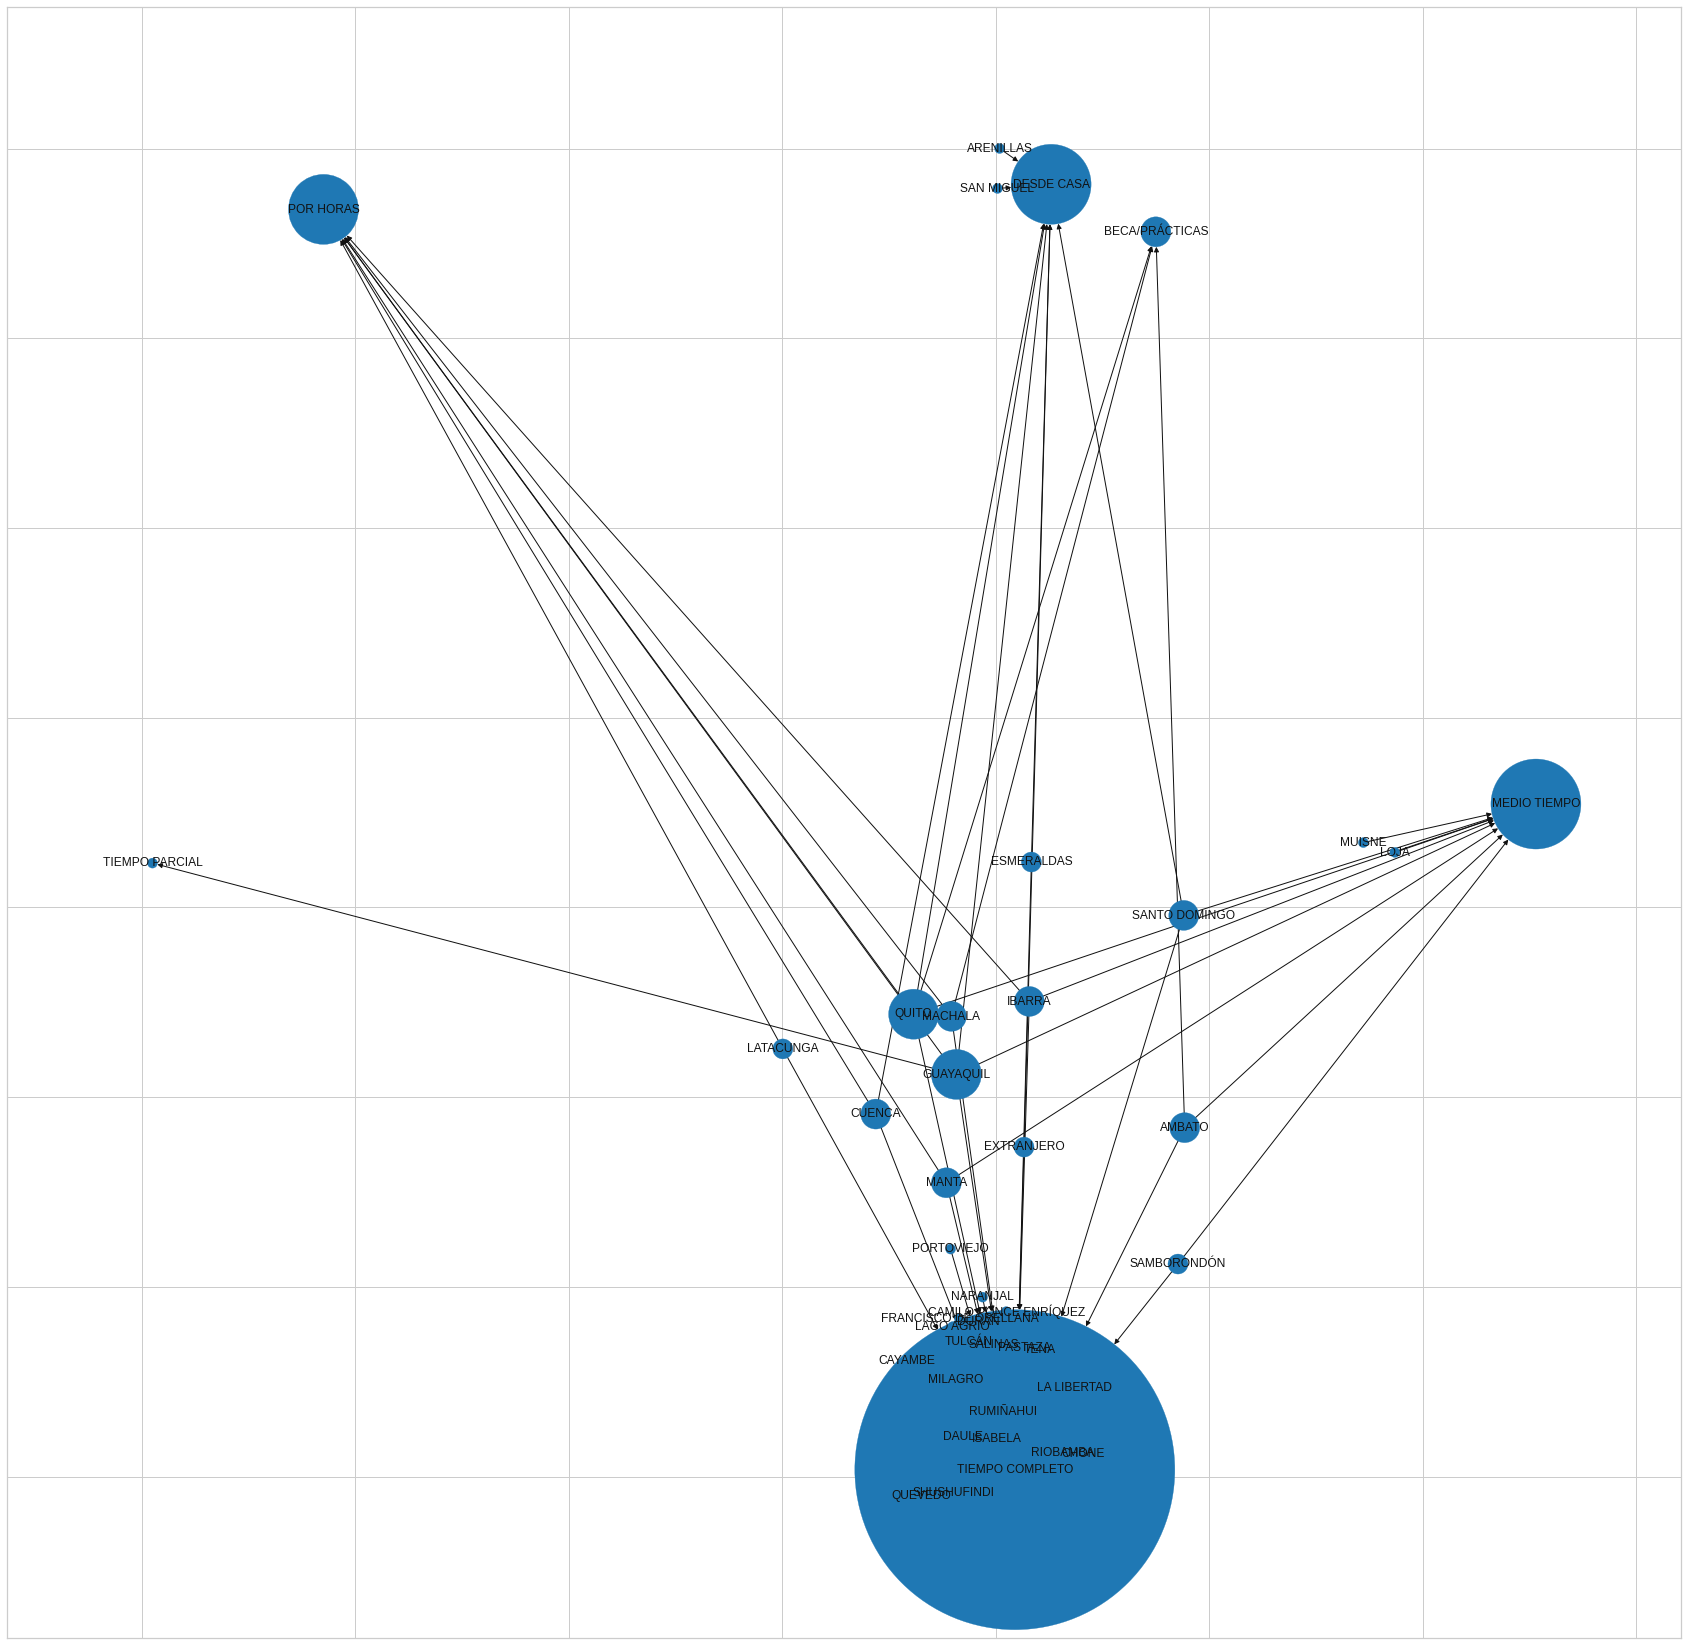

In [146]:
plt.figure(figsize=(30, 30))
nx.spring_layout(G2)
# El size del nodo dependerá del número de edges que este tendrá
nx.draw_networkx(G2, node_size=[v * v * 100 for v in list(dict(d2).values())])

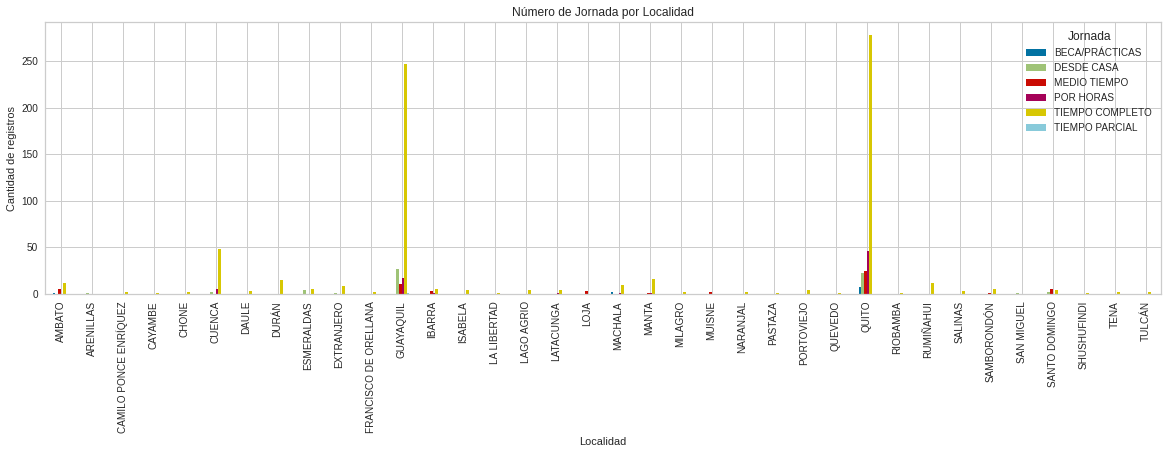

In [147]:
dfSNA2.groupby('Jornada').Localidad.value_counts().unstack(0).plot(kind='bar', figsize=(20, 5))
plt.title("Número de Jornada por Localidad")
plt.xlabel("Localidad")
plt.ylabel("Cantidad de registros")
plt.show()

## Clustering

### Función para darle un formato al feature Salario

In [7]:
def parseSalario(s):
    if s != 'A convenir':
        s2 = s.replace('$','')
        commaIdx = s2.find(',')
        final = s2[:commaIdx]        
        return final
    return s

### Parseo de datos

In [33]:
df['Salario'] = df['Salario'].map(parseSalario)

In [34]:
# Se cambia cada valor de categoría y jornada a mayúscula
# Esto se debe a que existen registros "Tiempo Completo" y "Tiempo completo", cuando ambos son equivalente
# Otro caso es el de los registros con "Desde Casa" y "Desde casa"
df['Jornada'] = df['Jornada'].apply(lambda x: x.upper())
df['Tipo de contrato'] = df['Tipo de contrato'].apply(lambda x: x.upper())

In [35]:
df.head()

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,500,Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020 - 14:32:54 pm,TIEMPO COMPLETO,CONTRATO A PLAZO INDETERMINADO
1,1,Auxiliar de bodega,PARTESCAT,500,Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020 - 12:46:40 pm,TIEMPO COMPLETO,OTRO TIPO DE CONTRATO
2,2,Chofer y oficial,Pluproxsa S.A.,406,Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020 - 12:46:36 pm,TIEMPO COMPLETO,CONTRATO POR TIEMPO INDEFINIDO
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,394,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020 - 12:25:27 pm,TIEMPO COMPLETO,CONTRATO POR TIEMPO INDEFINIDO
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020 - 12:25:22 pm,TIEMPO COMPLETO,CONTRATO POR TIEMPO INDEFINIDO


### Codificación de datos categóricos

In [36]:
labels1, uniques1 = pd.factorize(df['Jornada'])
df['Code_Jornada'] = labels1

In [37]:
labels2, uniques2 = pd.factorize(df['Tipo de contrato'])
df['Code_Contrato'] = labels2

In [74]:
labels3, uniques3 = pd.factorize(df['Localidad'])
df['Code_Localidad'] = labels3

In [73]:
labels4, uniques4 = pd.factorize(df['Categoria'])
df['Code_Categoria'] = labels4

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 907 non-null    int64 
 1   Nombre de trabajo  907 non-null    object
 2   Compania           907 non-null    object
 3   Salario            907 non-null    object
 4   Categoria          907 non-null    object
 5   Subcategoria       907 non-null    object
 6   Localidad          907 non-null    object
 7   Activo desde       907 non-null    object
 8   Jornada            907 non-null    object
 9   Tipo de contrato   907 non-null    object
 10  Code_Jornada       907 non-null    int64 
 11  Code_Contrato      907 non-null    int64 
 12  Code_Categoria     907 non-null    int64 
 13  Code_Localidad     907 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 99.3+ KB


### Exploración de valores de los features a utilizar en clustering

In [39]:
df['Jornada'].unique()

array(['TIEMPO COMPLETO', 'MEDIO TIEMPO', 'POR HORAS', 'DESDE CASA',
       'BECA/PRÁCTICAS', 'TIEMPO PARCIAL'], dtype=object)

In [40]:
df['Code_Jornada'].unique()

array([0, 1, 2, 3, 4, 5])

In [41]:
df['Tipo de contrato'].unique()

array(['CONTRATO A PLAZO INDETERMINADO', 'OTRO TIPO DE CONTRATO',
       'CONTRATO POR TIEMPO INDEFINIDO',
       'CONTRATO POR TIEMPO DETERMINADO', 'CONTRATO DE TEMPORADA',
       'CONTRATO INTERMITENTE', 'CONTRATO DE OBRA O LABOR',
       'CONTRATO POR NECESIDADES DEL MERCADO',
       'CONTRATO POR INICIO O INCREMENTO DE ACTIVIDAD',
       'CONTRATO FREELANCE', 'SIN ESPECIFICAR', 'CONTRATO DE APRENDIZAJE'],
      dtype=object)

In [42]:
df['Code_Contrato'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [76]:
df['Localidad'].unique()

array(['Guayaquil', 'Quito', 'Portoviejo', 'Manta', 'Machala', 'Durán',
       'Ambato', 'Esmeraldas', 'Cuenca', 'Loja', 'Isabela', 'Ibarra',
       'Samborondón', 'Chone', 'Naranjal', 'Daule', 'Santo Domingo',
       'Quevedo', 'Latacunga', 'Francisco de Orellana', 'Riobamba',
       'Extranjero', 'Salinas', 'Rumiñahui', 'Muisne', 'Lago Agrio',
       'San Miguel', 'Tena', 'Pastaza', 'Arenillas', 'Cayambe',
       'La Libertad', 'Shushufindi', 'Camilo Ponce Enríquez', 'Tulcán',
       'Milagro'], dtype=object)

In [77]:
df['Code_Localidad'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [78]:
df['Categoria'].unique()

array(['Almacenamiento / Logística / Distribución',
       'Comercial / Ventas / Atención al Cliente',
       'Diseño / Decoración / Artes Gráficas',
       'Recursos Humanos / Relaciones Públicas',
       'Informática / Telecomunicaciones', 'Medicina / Salud',
       'Producción / Mantenimiento / Operaciones',
       'Marketing / Publicidad / Producción Audiovisual',
       'Legal / Asesoría', 'Arquitectura / Ingenierías',
       'Hotelería / Turismo', 'Docencia / Educación',
       'Compras / Comercio Exterior',
       'Construcción / Obras / Edificaciones',
       'Administración / Contabilidad / Finanzas'], dtype=object)

In [79]:
df['Code_Categoria'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Primer método clustering con los features Jornada y Contrato usando Kmeans

#### Obteniendo dataframe sólo con los features a utilizar

In [87]:
X1 = df[['Code_Jornada', 'Code_Contrato']].values

In [88]:
model1 = KMeans()

#### Aplicando método del codo para encontrar el número de cluster adecuado

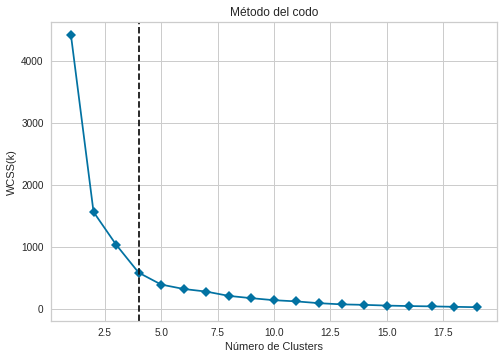

In [113]:
visualizer = KElbowVisualizer(model1, k=(1, 20), timings=False)
visualizer.fit(X1)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

#### Creando el modelo utilizando Kmeans

In [120]:
kmeans1 = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans1 = kmeans1.fit_predict(X1)

#### Graficando los valores de acuerdo al modelo de clustering obtenido con Jornada y Contrato

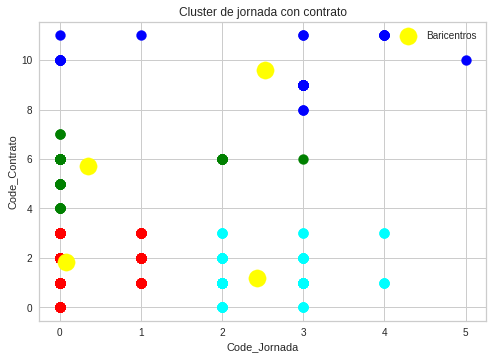

In [148]:
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 100, c = "red", label = "")
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 100, c = "blue")
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 100, c = "green")
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 100, c = "cyan")
# plt.scatter(X1[y_kmeans1 == 4, 0], X1[y_kmeans1 == 4, 1], s = 100, c = "gray")

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de jornada con contrato")
plt.xlabel("Code_Jornada")
plt.ylabel("Code_Contrato")
plt.legend()
plt.show()

### Segundo método clustering con los features Contrato y Localidad usando Kmeans

#### Obteniendo dataframe sólo con los features a utilizar

In [96]:
X2 = df[['Code_Contrato', 'Code_Localidad']].values

In [97]:
model2 = KMeans()

#### Aplicando método del codo para encontrar el número de cluster adecuado

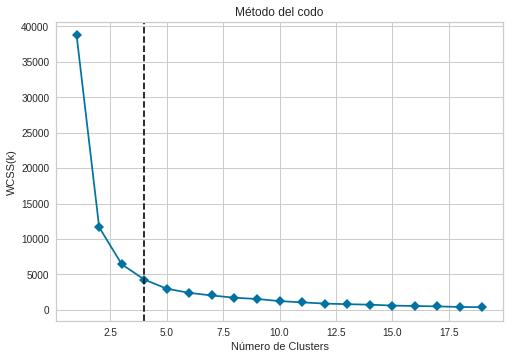

In [114]:
visualizer = KElbowVisualizer(model2, k=(1, 20), timings=False)
visualizer.fit(X2)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

#### Creando el modelo utilizando Kmeans

In [115]:
kmeans2 = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(X2)

#### Graficando los valores de acuerdo al modelo de clustering obtenido con Contrato y Localidad

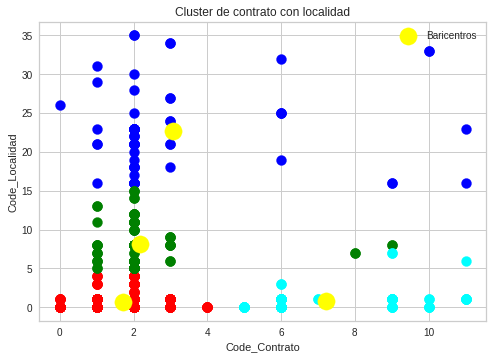

In [150]:
plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], s = 100, c = "red", label = "")
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], s = 100, c = "blue")
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 1], s = 100, c = "green")
plt.scatter(X2[y_kmeans2 == 3, 0], X2[y_kmeans2 == 3, 1], s = 100, c = "cyan")
# plt.scatter(X2[y_kmeans2 == 4, 0], X2[y_kmeans2 == 4, 1], s = 100, c = "gray")

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de contrato con localidad")
plt.xlabel("Code_Contrato")
plt.ylabel("Code_Localidad")
plt.legend()
plt.show()

### Tercer método clustering con los features Localidad y Categoria usando Kmeans

#### Obteniendo dataframe sólo con los features a utilizar

In [101]:
X3 = df[['Code_Localidad', 'Code_Categoria']].values

In [102]:
model3 = KMeans()

#### Aplicando método del codo para encontrar el número de cluster adecuado

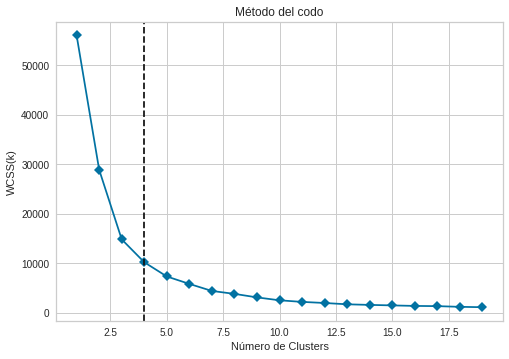

In [117]:
visualizer = KElbowVisualizer(model3, k=(1, 20), timings=False)
visualizer.fit(X3)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

#### Creando el modelo utilizando Kmeans

In [118]:
kmeans3 = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans3 = kmeans3.fit_predict(X3)

#### Graficando los valores de acuerdo al modelo de clustering obtenido con Localidad y Categoría

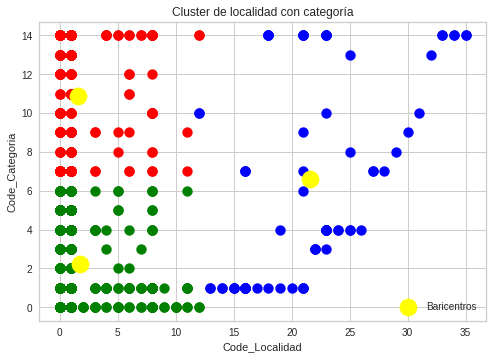

In [149]:
plt.scatter(X3[y_kmeans3 == 0, 0], X3[y_kmeans3 == 0, 1], s = 100, c = "red", label = "")
plt.scatter(X3[y_kmeans3 == 1, 0], X3[y_kmeans3 == 1, 1], s = 100, c = "blue")
plt.scatter(X3[y_kmeans3 == 2, 0], X3[y_kmeans3 == 2, 1], s = 100, c = "green")
# plt.scatter(X3[y_kmeans3 == 3, 0], X3[y_kmeans3 == 3, 1], s = 100, c = "cyan")
# plt.scatter(X3[y_kmeans3 == 4, 0], X3[y_kmeans3 == 4, 1], s = 100, c = "gray")

plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de localidad con categoría")
plt.xlabel("Code_Localidad")
plt.ylabel("Code_Categoria")
plt.legend()
plt.show()